In [1]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix, average_precision_score

In [2]:
labels = 'Atelectasis,Cardiomegaly,Consolidation,Edema,Enlarged Cardiomediastinum,Fracture,Lung Lesion,Lung Opacity,No Finding,Pleural Effusion,Pleural Other,Pneumonia,Pneumothorax,Support Devices'.split(',')
labels = np.array(labels)

In [3]:
preds = pickle.load(open('predictions.pkl', 'rb'))
hist = pickle.load(open('train_hist.pkl', 'rb'))

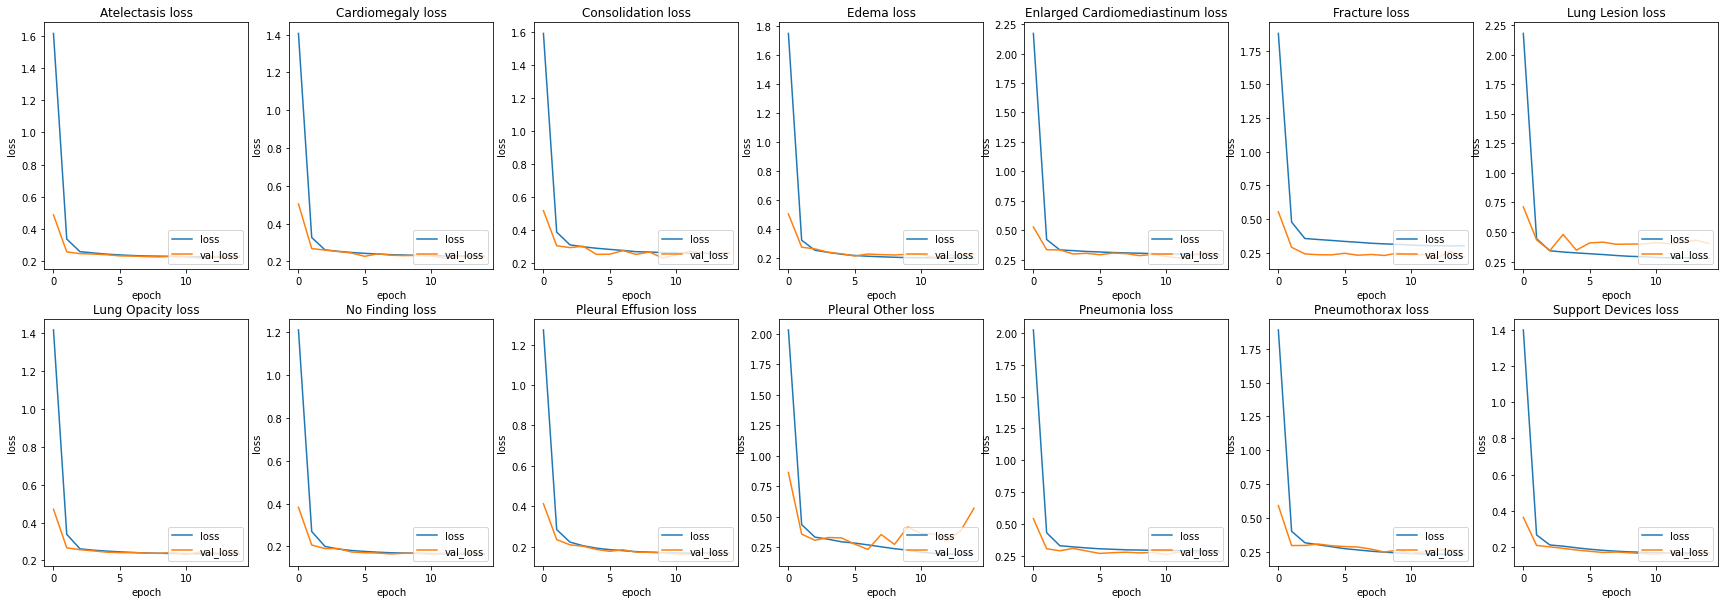

In [4]:
# Loss Plots
fig, ax = plt.subplots(nrows=2, ncols=7, figsize=(30, 10))
for i, lab in enumerate(labels):
    label_name = "".join(lab.split(" ")).lower()
    loss = hist[f'{label_name}_loss']
    val_loss = hist[f'val_{label_name}_loss']
    title = f'{lab} loss'

    if i < 7:
        x = 0
    else:
        x = 1
    
    if i < 7:
        y = i
    else:
        y = i - 7

    ax[x, y].plot(loss, label='loss')
    ax[x, y].plot(val_loss, label='val_loss')
    ax[x, y].title.set_text(title)
    ax[x, y].legend(loc=4)
    ax[x, y].set_xlabel('epoch')
    ax[x, y].set_ylabel('loss')
    
    


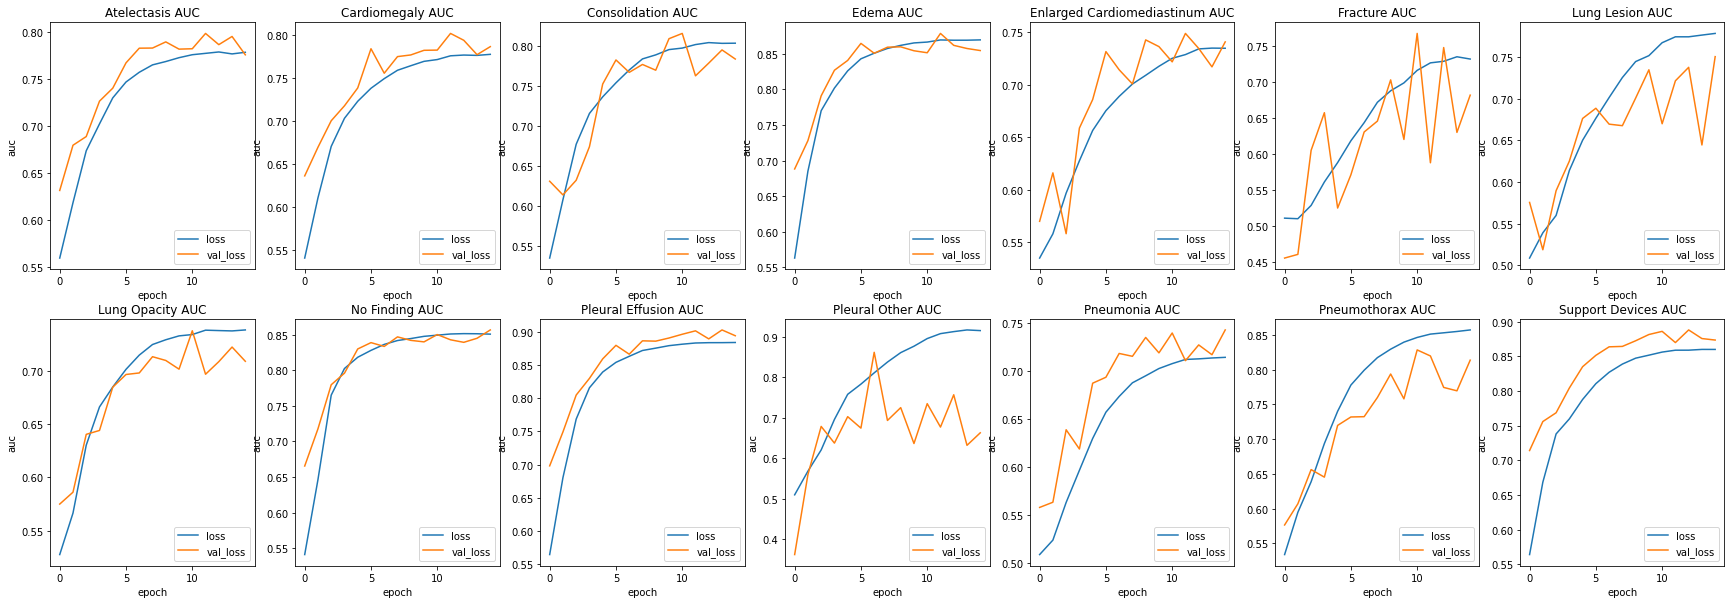

In [5]:
# ROC AUC Plots
fig, ax = plt.subplots(nrows=2, ncols=7, figsize=(30, 10))
for i, lab in enumerate(labels):
    label_name = "".join(lab.split(" ")).lower()
    auc = hist[f'{label_name}_auc']
    val_auc = hist[f'val_{label_name}_auc']
    title = f'{lab} AUC'

    if i < 7:
        x = 0
    else:
        x = 1
    
    if i < 7:
        y = i
    else:
        y = i - 7

    ax[x, y].plot(auc, label='loss')
    ax[x, y].plot(val_auc, label='val_loss')
    ax[x, y].title.set_text(title)
    ax[x, y].legend(loc=4)
    ax[x, y].set_xlabel('epoch')
    ax[x, y].set_ylabel('auc')

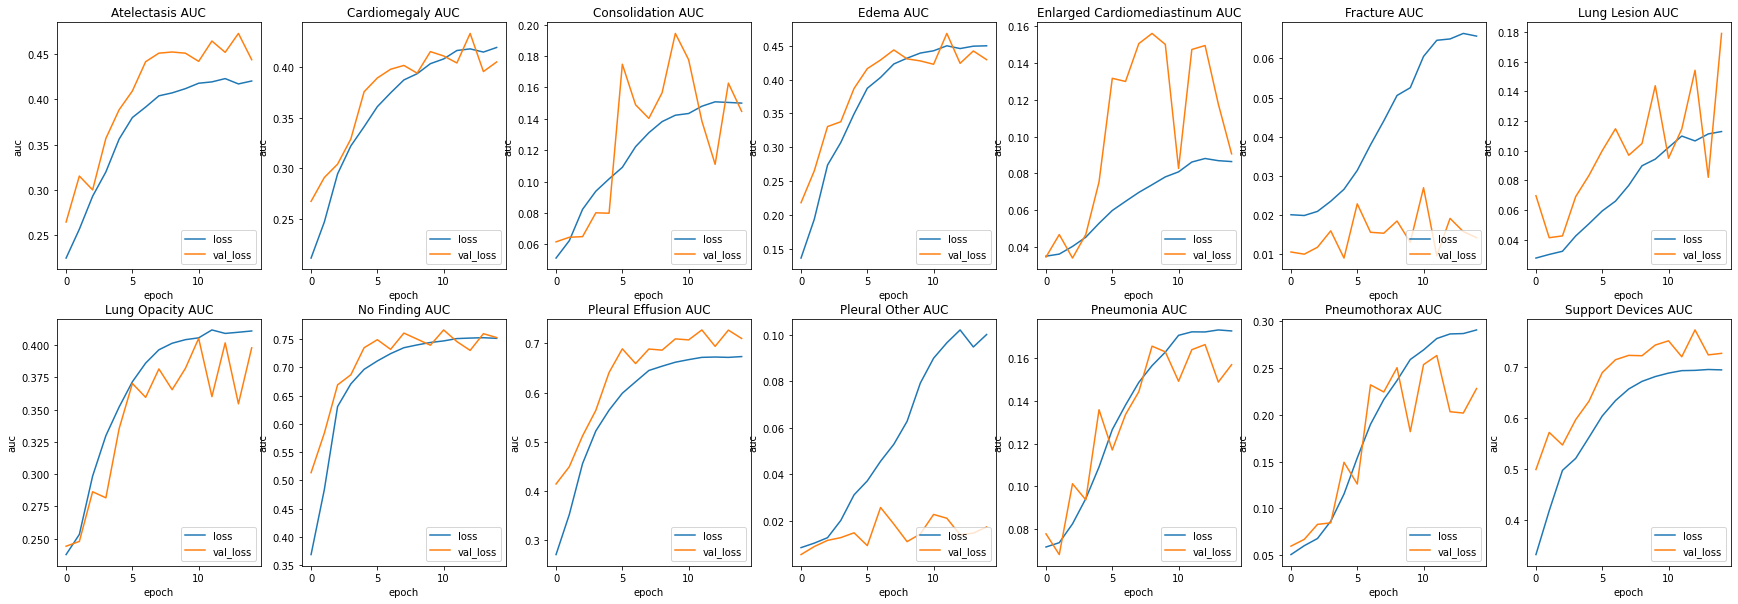

In [6]:
# PR AUC Plots
fig, ax = plt.subplots(nrows=2, ncols=7, figsize=(30, 10))
for i, lab in enumerate(labels):
    label_name = "".join(lab.split(" ")).lower()
    auc = hist[f'{label_name}_auc_1']
    val_auc = hist[f'val_{label_name}_auc_1']
    title = f'{lab} AUC'

    if i < 7:
        x = 0
    else:
        x = 1
    
    if i < 7:
        y = i
    else:
        y = i - 7

    ax[x, y].plot(auc, label='loss')
    ax[x, y].plot(val_auc, label='val_loss')
    ax[x, y].title.set_text(title)
    ax[x, y].legend(loc=4)
    ax[x, y].set_xlabel('epoch')
    ax[x, y].set_ylabel('auc')

In [7]:
preds = np.array(preds)

In [8]:
preds.shape

(14, 3403, 1)

In [9]:
shaped = preds.T[0]

In [10]:
shaped.shape

(3403, 14)

In [11]:
test = pd.read_csv('../../../../processed_splits/test.csv')

In [12]:
results = pd.DataFrame(shaped, columns=['pred_' + x for x in labels])

In [13]:
merged = pd.concat([test, results], axis=1)

In [14]:
merged.head()

,subject_id,study_id,Atelectasis,Cardiomegaly,Consolidation,Edema,Enlarged Cardiomediastinum,Fracture,Lung Lesion,Lung Opacity,...,pred_Enlarged Cardiomediastinum,pred_Fracture,pred_Lung Lesion,pred_Lung Opacity,pred_No Finding,pred_Pleural Effusion,pred_Pleural Other,pred_Pneumonia,pred_Pneumothorax,pred_Support Devices
0,10046166,50051329,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.533587,0.507976,0.445859,0.418101,0.522735,0.366859,0.404965,0.421287,0.403998,0.479716
1,10046166,51738740,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.536557,0.431703,0.430827,0.424360,0.527793,0.275755,0.268765,0.449292,0.437160,0.543823
2,10046166,53492798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.524415,0.545982,0.550452,0.478762,0.432764,0.556735,0.589180,0.460688,0.583591,0.461897
3,10046166,53492798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.528257,0.514945,0.519748,0.472304,0.494197,0.456703,0.517660,0.482406,0.548064,0.474440
4,10046166,56173345,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.530911,0.470699,0.441790,0.485898,0.465511,0.444929,0.379132,0.489081,0.428688,0.506451


In [15]:
fpr = {}
tpr = {}
auc = {}
for lab in labels:
    ytrue = merged[lab]
    ypred = merged['pred_'+lab]
    tfpr, ttpr, _ = roc_curve(ytrue, ypred)
    tauc = roc_auc_score(ytrue, ypred)
    fpr[lab] = tfpr
    tpr[lab] = ttpr
    auc[lab] = tauc


In [16]:
auc

{'Atelectasis': 0.714723171755127,
 'Cardiomegaly': 0.7431148142344293,
 'Consolidation': 0.725238748530093,
 'Edema': 0.8168285908632973,
 'Enlarged Cardiomediastinum': 0.6890707452057144,
 'Fracture': 0.7213683568348515,
 'Lung Lesion': 0.686892189302028,
 'Lung Opacity': 0.669957998964791,
 'No Finding': 0.7806257663858234,
 'Pleural Effusion': 0.8521422410040913,
 'Pleural Other': 0.860170135918639,
 'Pneumonia': 0.6634761792862861,
 'Pneumothorax': 0.7660540662058113,
 'Support Devices': 0.8393768798182113}

In [17]:
# Overall Average Precision Score 
aps_macro = {}
for lab in labels:
    ytrue = merged[lab]
    ypred = merged['pred_'+lab]
    taps = average_precision_score(ytrue, ypred, average='macro') # weighted and macro provide similar results
    aps_macro[lab] = taps

aps_macro

{'Atelectasis': 0.3804763544537812,
 'Cardiomegaly': 0.46405851277200477,
 'Consolidation': 0.15331141468212886,
 'Edema': 0.5322602261717857,
 'Enlarged Cardiomediastinum': 0.08596994436111577,
 'Fracture': 0.08085867482963596,
 'Lung Lesion': 0.08395600318392403,
 'Lung Opacity': 0.4687030740964345,
 'No Finding': 0.4642909395341938,
 'Pleural Effusion': 0.7207849981646294,
 'Pleural Other': 0.07111044029904684,
 'Pneumonia': 0.18681432006499027,
 'Pneumothorax': 0.13194702194210658,
 'Support Devices': 0.7334311564979509}

In [18]:
merged.head()

,subject_id,study_id,Atelectasis,Cardiomegaly,Consolidation,Edema,Enlarged Cardiomediastinum,Fracture,Lung Lesion,Lung Opacity,...,pred_Enlarged Cardiomediastinum,pred_Fracture,pred_Lung Lesion,pred_Lung Opacity,pred_No Finding,pred_Pleural Effusion,pred_Pleural Other,pred_Pneumonia,pred_Pneumothorax,pred_Support Devices
0,10046166,50051329,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.533587,0.507976,0.445859,0.418101,0.522735,0.366859,0.404965,0.421287,0.403998,0.479716
1,10046166,51738740,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.536557,0.431703,0.430827,0.424360,0.527793,0.275755,0.268765,0.449292,0.437160,0.543823
2,10046166,53492798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.524415,0.545982,0.550452,0.478762,0.432764,0.556735,0.589180,0.460688,0.583591,0.461897
3,10046166,53492798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.528257,0.514945,0.519748,0.472304,0.494197,0.456703,0.517660,0.482406,0.548064,0.474440
4,10046166,56173345,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.530911,0.470699,0.441790,0.485898,0.465511,0.444929,0.379132,0.489081,0.428688,0.506451


In [19]:
for lab in labels:
    print(merged[lab].value_counts())

0.0    2639
1.0     764
Name: Atelectasis, dtype: int64
0.0    2507
1.0     896
Name: Cardiomegaly, dtype: int64
0.0    3192
1.0     211
Name: Consolidation, dtype: int64
0.0    2677
1.0     726
Name: Edema, dtype: int64
0.0    3260
1.0     143
Name: Enlarged Cardiomediastinum, dtype: int64
0.0    3316
1.0      87
Name: Fracture, dtype: int64
0.0    3282
1.0     121
Name: Lung Lesion, dtype: int64
0.0    2305
1.0    1098
Name: Lung Opacity, dtype: int64
0.0    2809
1.0     594
Name: No Finding, dtype: int64
0.0    2308
1.0    1095
Name: Pleural Effusion, dtype: int64
0.0    3340
1.0      63
Name: Pleural Other, dtype: int64
0.0    3061
1.0     342
Name: Pneumonia, dtype: int64
0.0    3295
1.0     108
Name: Pneumothorax, dtype: int64
0.0    2192
1.0    1211
Name: Support Devices, dtype: int64


In [22]:
merged.to_csv('results_model_2.csv', index=False)

In [23]:
train = pd.read_csv('../../../../processed_splits/train.csv')

In [24]:
for lab in labels:
    print(train[lab].value_counts())

0.0    190331
1.0     47631
Name: Atelectasis, dtype: int64
0.0    191587
1.0     46375
Name: Cardiomegaly, dtype: int64
0.0    226731
1.0     11231
Name: Consolidation, dtype: int64
0.0    209621
1.0     28341
Name: Edema, dtype: int64
0.0    230506
1.0      7456
Name: Enlarged Cardiomediastinum, dtype: int64
0.0    233286
1.0      4676
Name: Fracture, dtype: int64
0.0    231526
1.0      6436
Name: Lung Lesion, dtype: int64
0.0    184707
1.0     53255
Name: Lung Opacity, dtype: int64
0.0    158076
1.0     79886
Name: No Finding, dtype: int64
0.0    181841
1.0     56121
Name: Pleural Effusion, dtype: int64
0.0    235957
1.0      2005
Name: Pleural Other, dtype: int64
0.0    221205
1.0     16757
Name: Pneumonia, dtype: int64
0.0    226916
1.0     11046
Name: Pneumothorax, dtype: int64
0.0    166514
1.0     71448
Name: Support Devices, dtype: int64
